# Predict Salary based on years of experience
## Context

Here we have a dataset consisting of observations of the salary of Data Scientists and their years of experience.
The probleme here is pretty simple and straighforward: we want to predict the future salary of a Data Scientist based on their experience.


## Hypothesis
Our first assumption will be that our predictor (years of expexrience) and the target (salary) have linear relationship.


## Exploratory Data Analysis
We begin by importing the dataset:


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Salary_Data.csv")
df.head(5)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
df.shape

(30, 2)

The dataset has thirty rows and two columns. 
The next step is to have an overview of the tendencies , missing values and outliers if there is any: 

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


We can see that we don't have any missing value: the number of observation of each column is equal to th number of rows, and the minimum value observed for each row is greater than zero , wich could be considered as a missing value.

Now let's plot our data points to see if there is any visible linear relationship.

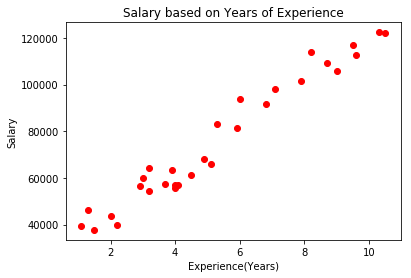

In [10]:
# Scatter plot of all the data points included in the dataset
plt.scatter(df['YearsExperience'], df['Salary'], color="red")
plt.title("Salary based on Years of Experience")
plt.xlabel("Experience(Years)")
plt.ylabel("Salary")
plt.show()

We can see a clear linear trend. To be sure we can also asses the strength of the relationship by calculating the correlation between the variable and the target.

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Modelisation

We can begin our modelisation with a Simple Linear regression. Fisrt separate the feature and the target then split the dataset into train set (70% of the dataset) and test set (30% of the dataset).

In [14]:
# Separating the feature and the target
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values  

# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Now we can start training our model and visualize the result.

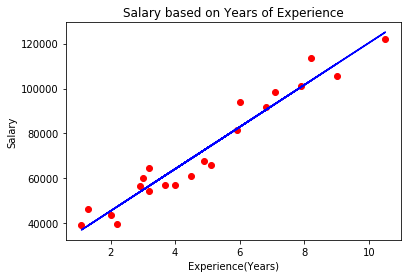

In [18]:
# Fitting simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Visualize the data points in the tarining set and the fitting line
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary based on Years of Experience")
plt.xlabel("Experience(Years)")
plt.ylabel("Salary")
plt.show()

Let's see how the data in the test set fits in.

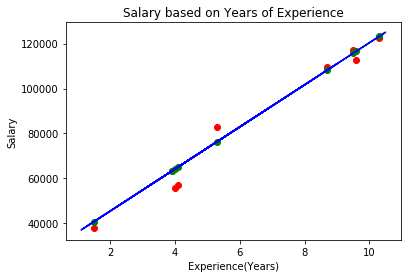

In [19]:
# Prediction of the values in the test set
y_pred = regressor.predict(X_test)

plt.scatter(X_test, y_test, color="red")
plt.scatter(X_test, y_pred, color="green")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary based on Years of Experience")
plt.xlabel("Experience(Years)")
plt.ylabel("Salary")
plt.show()